In [2]:
import os
os.getcwd()

'C:\\Users\\a\\git\\practical-statistics-for-data-scientists\\python\\notebooks'

In [3]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

In [4]:
os.chdir('C:/Users/a/git/practical-statistics-for-data-scientists')
Data=Path().resolve()/'data'


In [5]:
Path().resolve()/'data'

WindowsPath('C:/Users/a/git/practical-statistics-for-data-scientists/data')

In [6]:
Data

WindowsPath('C:/Users/a/git/practical-statistics-for-data-scientists/data')

In [22]:
LOANS_INCOME_CSV = Data/"loans_income.csv"
SP500_DATA_CSV = Data /'sp500_data.csv.gz'

In [8]:
loans=pd.read_csv(LOANS_INCOME_CSV)

In [9]:
import seaborn as sns
import matplotlib.pylab as plt

In [21]:
loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

In [11]:
sample_data=pd.DataFrame({'income':loans_income.sample (1000),'type':'Data'})

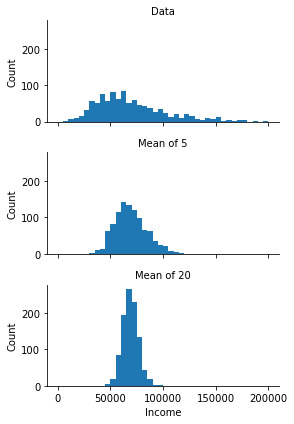

In [12]:
sample_mean_05=pd.DataFrame({'income':[loans_income.sample(5).mean() for _ in range(1000)], 'type':'Mean of 5'})
sample_mean_20=pd.DataFrame({'income':[loans_income.sample(20).mean() for _ in range(1000)], 'type':'Mean of 20'})
results=pd.concat([sample_data,sample_mean_05,sample_mean_20])
g=sns.FacetGrid(results,col='type',col_wrap=1,height=2,aspect=2)
g.map(plt.hist,'income',range=[0,200000],bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

In [13]:
results

,income,type
8181,99000.00,Data
2823,74000.00,Data
46607,81000.00,Data
9958,21000.00,Data
4649,150000.00,Data
...,...,...
995,70058.15,Mean of 20
996,58119.35,Mean of 20
997,78501.80,Mean of 20
998,75570.00,Mean of 20


In [14]:
results=[]

for nrepeat in range(1000):
    sample=resample(loans_income)
    results.append(sample.median())
results=pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias:{results.mean()-loans_income.median()}')
print(f'std error: {results.std()}')
      


Bootstrap Statistics:
original: 62000.0
bias:-80.00800000000163
std error: 223.64384969747798


loans_income.mean: 68760.51844
sample20.mean 55734.1


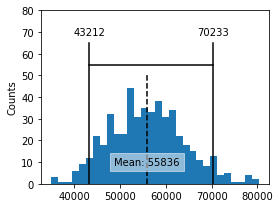

In [15]:
print(f'loans_income.mean: {loans_income.mean()}')
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20=resample(loans_income, n_samples=20,replace=False)
print('sample20.mean', sample20.mean())
results=[]
for nrepeat in range (500):
    sample=resample(sample20)
    results.append(sample.mean())
results=pd.Series(results)

confidence_interval=list(results.quantile([0.05,0.95]))
    
ax=results.plot.hist(bins=30,figsize=(4,3))
ax.plot(confidence_interval, [55, 55], color ='black')
for x in confidence_interval:
    ax.plot([x,x],[0,65], color='black')
    ax.text(x,70,f'{x:.0f}', horizontalalignment='center', verticalalignment='center')

meanIncome=results.mean()
ax.plot([meanIncome,meanIncome],[0,50], color='black',linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

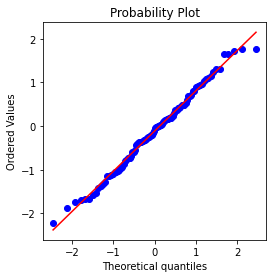

In [17]:
fig, ax=plt.subplots(figsize=(4,4))

norm_sample=stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)
plt.show()

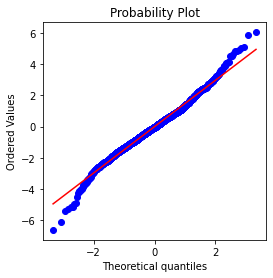

In [24]:
sp500_px = pd.read_csv(SP500_DATA_CSV)
nflx=sp500_px.NFLX
nflx=np.diff(np.log(nflx[nflx>0]))
fig,ax=plt.subplots(figsize=(4,4))
stats.probplot(nflx, plot=ax)
plt.show()

In [26]:
stats.binom.pmf(2,n=5,p=0.1)

0.0729

In [27]:
stats.binom.cdf(2,n=5,p=0.1)

0.99144